# Predicting Cancer Mortality Rates

## Exploring Univariate and Multivariate Linear Regression to predict the number of cancer mortalities 

### Dataset variables and a brief description of each.

The important takeaway of this section is to note that the TARGET_deathRate variable is what we're trying to *predict*, also known as the dependent variable - the outcome of this variable is dependent on other variables. 


**TARGET_deathRate**: *Dependent* variable. Mean per capita (100,000) cancer mortalities

**avgAnnCount**: Mean number of reported cases of cancer diagnosed annually

**avgDeathsPerYear**: Mean number of reported mortalities due to cancer

**incidenceRate**: Mean per capita (100,000) cancer diagoses

**medianIncome**: Median income per county 

**popEst2015**: Population of county

**povertyPercent**: Percent of populace in poverty

**studyPerCap**: Per capita number of cancer-related clinical trials per county

**binnedInc**: Median income per capita binned by decile

**MedianAge**: Median age of county residents

**MedianAgeMale**: Median age of male county residents

**MedianAgeFemale**: Median age of female county residents

**Geography**: County name 

**AvgHouseholdSize**: Mean household size of county 

**PercentMarried**: Percent of county residents who are married

**PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school 

**PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma 

**PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college

**PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

**PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma 

**PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

**PctEmployed16_Over**: Percent of county residents ages 16 and over employed 

**PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed 

**PctPrivateCoverage**: Percent of county residents with private health coverage 

**PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) 

**PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage 

**PctPublicCoverage**: Percent of county residents with government-provided health coverage 

**PctPublicCoverageAlone**: Percent of county residents with government-provided health coverage alone 

**PctWhite**: Percent of county residents who identify as White 

**PctBlack**: Percent of county residents who identify as Black 

**PctAsian**: Percent of county residents who identify as Asian 

**PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian 

**PctMarriedHouseholds**: Percent of married households 

**BirthRate**: Number of live births relative to number of women in county 

## Generalized Steps

1. Load & review data
2. Clean & transform
3. Find correlations for independent variable selection
4. Split model training and testing data
5. Train Univariate & Multivariate Linear Regression models
6. Review outputs and model accuracy

## Library Selection

**Pandas** - Used for dataframe generation, manipulation and general data exploration

**NumPy** - Numerical package that will mostly just be used for taking the square root for model performance. 

**Matplotlib** - Graphical visualizations, mostly for interpreting model results and initial data.

**Seaborn** - Graphical statistics library that provides some great correlation heatmaps.

**MissingNo** - Provides the ability to visualize missing values.

**Sci-kit Learn** - Library used for the linear regression models and providing ease of train/test data splits.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option("display.max.columns", None)

In [3]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/fqz3z5pii3cpedbaevzfuixm3ju6gc', encoding='iso-8859-1')
df.shape

(3047, 34)

In [4]:
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   MedianAgeMale  MedianAgeFemale                     Geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   AvgHouseholdSize  PercentMarried  PctNoHS18_24  PctHS18_24  \
0              2.54            52.5          11.5        39.5   
1              2.34            44.5           6.1        22.4   
2              2.62            54.2          24.0        36.6   
3              2.52            52.7          20.2        41.2   
4              2.34            57.8          14.9        43.0   

   PctSomeCol18_24  PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
0             42.1              6.9          23.2               19.6   
1             64.0              7.5          26.0               22.7   
2              NaN              9.5          29.0               16.0   
3             36.1              2.5          31.6                9.3   
4             40.0              2.0          33.4               15.0   

   PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0                51.9                   8.0                75.1   
1                55.9                   7.8                70.2   
2                45.9                   7.0                63.7   
3                48.3                  12.1                58.4   
4                48.2                   4.8                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN                41.6               32.9   
1                     53.8                43.6               31.1   
2                     43.5                34.9               42.1   
3                     40.3                35.0               45.3   
4                     43.9                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
df.columns = map(str.lower, df.columns)

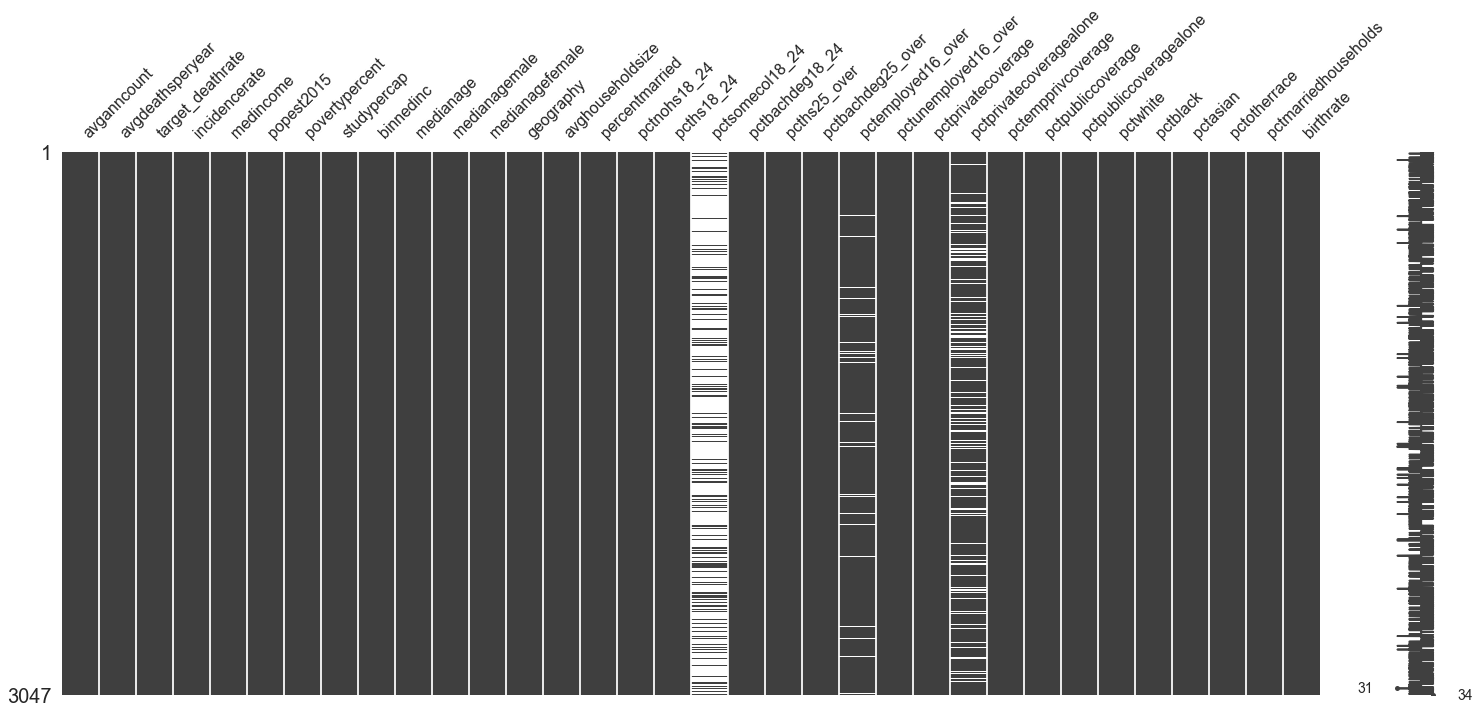

In [7]:
msno.matrix(df)

In [8]:
df.isna().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctother

In [9]:
old_colvalues = df[['pctsomecol18_24','pctemployed16_over','pctprivatecoveragealone']]
old_colvalues

pctsomecol18_24  pctemployed16_over  pctprivatecoveragealone
0                42.1                51.9                      NaN
1                64.0                55.9                     53.8
2                 NaN                45.9                     43.5
3                36.1                48.3                     40.3
4                40.0                48.2                     43.9
...               ...                 ...                      ...
3042              NaN                51.7                     54.9
3043             35.6                70.1                     53.3
3044             33.3                64.8                     52.6
3045              NaN                 NaN                     56.3
3046             43.9                48.8                     60.3

[3047 rows x 3 columns]

In [10]:
df.fillna(df.mean(),inplace=True)

In [11]:
df.isna().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
avghouseholdsize           0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

In [12]:
print(old_colvalues)
print('\n')
print(df[['pctsomecol18_24','pctemployed16_over','pctprivatecoveragealone']])

      pctsomecol18_24  pctemployed16_over  pctprivatecoveragealone
0                42.1                51.9                      NaN
1                64.0                55.9                     53.8
2                 NaN                45.9                     43.5
3                36.1                48.3                     40.3
4                40.0                48.2                     43.9
...               ...                 ...                      ...
3042              NaN                51.7                     54.9
3043             35.6                70.1                     53.3
3044             33.3                64.8                     52.6
3045              NaN                 NaN                     56.3
3046             43.9                48.8                     60.3

[3047 rows x 3 columns]


      pctsomecol18_24  pctemployed16_over  pctprivatecoveragealone
0           42.100000           51.900000                48.453774
1           64.000000           55.

In [13]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'avghouseholdsize', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [14]:
corr = df.corr(method='pearson')
corr = corr.sort_values(by=['target_deathrate'],ascending=False)
corr

avganncount  avgdeathsperyear  target_deathrate  \
target_deathrate           -0.143532         -0.090715          1.000000   
incidencerate               0.073553          0.062690          0.449432   
pctpubliccoveragealone     -0.093699         -0.027338          0.449358   
povertypercent             -0.135694         -0.066918          0.429389   
pcths25_over               -0.311375         -0.295929          0.404589   
pctpubliccoverage          -0.173548         -0.131687          0.404572   
pctunemployed16_over       -0.009016          0.069701          0.378412   
pcths18_24                 -0.182054         -0.151418          0.261976   
pctblack                    0.031376          0.084607          0.257024   
pctnohs18_24               -0.143327         -0.136794          0.088463   
medianagefemale            -0.122844         -0.144069          0.012048   
medianage                  -0.024098         -0.024599          0.004375   
medianagemale              -0.124969         -0.148487         -0.021929   
studypercap                 0.082071          0.063488         -0.022285   
avghouseholdsize            0.064788          0.086161         -0.036905   
birthrate                  -0.034508         -0.074420         -0.087407   
avgdeathsperyear            0.939408          1.000000         -0.090715   
pctsomecol18_24             0.070159          0.063322         -0.094765   
popest2015                  0.926894          0.977634         -0.120073   
avganncount                 1.000000          0.939408         -0.143532   
pctwhite                   -0.136501         -0.187159         -0.177400   
pctasian                    0.435071          0.443074         -0.186331   
pctotherrace                0.209184          0.215149         -0.189894   
percentmarried             -0.106108         -0.181029         -0.266820   
pctempprivcoverage          0.202349          0.160124         -0.267399   
pctbachdeg18_24             0.284176          0.259761         -0.287817   
pctmarriedhouseholds       -0.106221         -0.160266         -0.293325   
pctprivatecoveragealone     0.166674          0.112221         -0.326067   
pctprivatecoverage          0.132244          0.056183         -0.386066   
pctemployed16_over          0.197981          0.125015         -0.397487   
medincome                   0.269145          0.223207         -0.428615   
pctbachdeg25_over           0.321021          0.293210         -0.485477   

                         incidencerate  medincome  popest2015  povertypercent  \
target_deathrate              0.449432  -0.428615   -0.120073        0.429389   
incidencerate                 1.000000  -0.001036    0.026912        0.009046   
pctpubliccoveragealone        0.040812  -0.719756   -0.041469        0.798642   
povertypercent                0.009046  -0.788965   -0.065299        1.000000   
pcths25_over                  0.121725  -0.471348   -0.311849        0.194361   
pctpubliccoverage             0.046109  -0.754822   -0.160066        0.651162   
pctunemployed16_over          0.099979  -0.453108    0.050768        0.655148   
pcths18_24                    0.022644  -0.190006   -0.151821        0.094211   
pctblack                      0.113489  -0.270232    0.073044        0.511530   
pctnohs18_24                 -0.170762  -0.289383   -0.126582        0.288106   
medianagefemale              -0.009106  -0.153278   -0.177932       -0.148164   
medianage                     0.018089  -0.013288   -0.025219       -0.029280   
medianagemale                -0.014733  -0.091663   -0.176608       -0.214001   
studypercap                   0.077283   0.044003    0.055722       -0.055652   
avghouseholdsize             -0.118400   0.112065    0.109940        0.074308   
birthrate                    -0.118181  -0.010195   -0.057740       -0.012283   
avgdeathsperyear              0.062690   0.223207    0.977634       -0.066918   
pctsomecol18_24               0.038442   0.101864    0.065

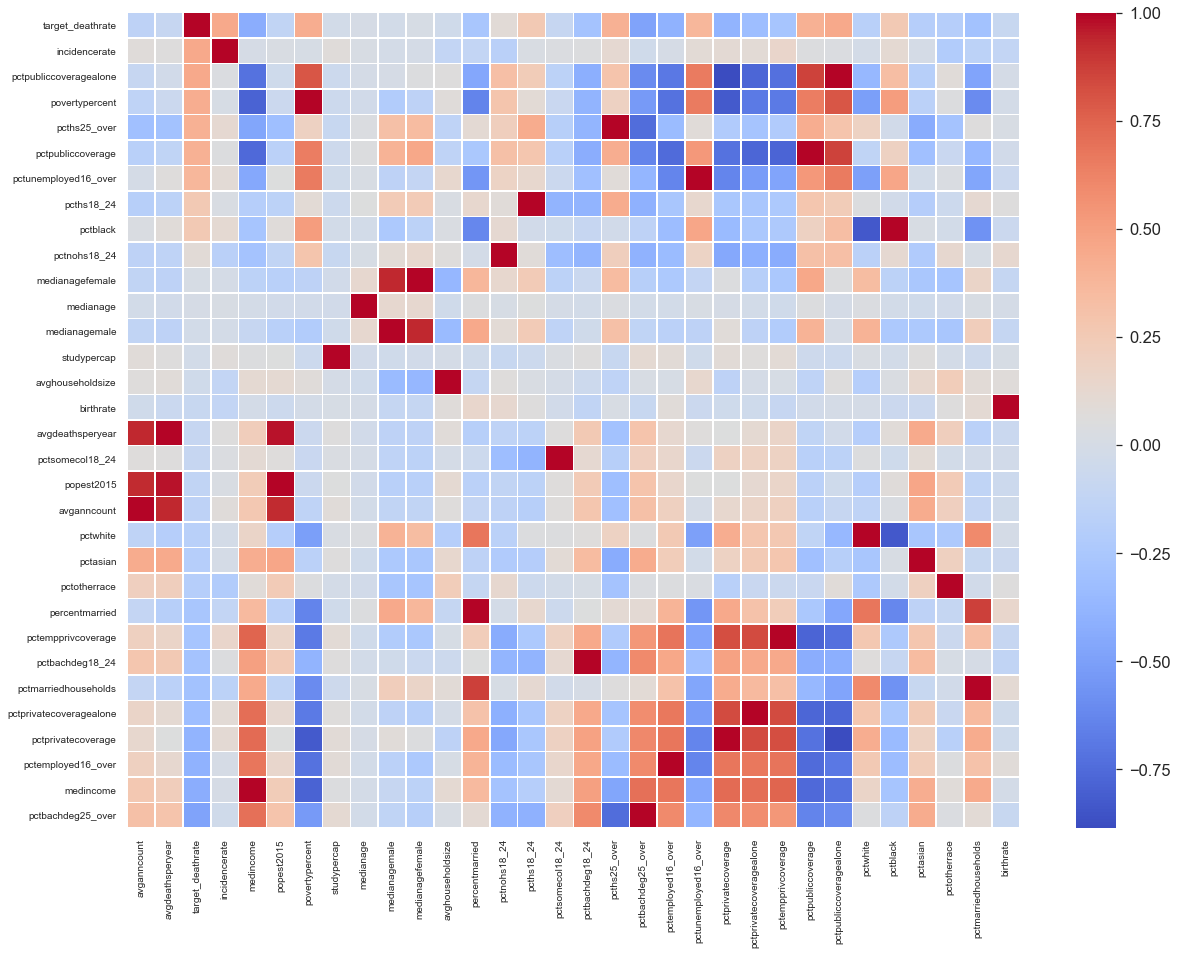

In [15]:
plt.clf
fig, ax = plt.subplots(figsize=(20,15))  
sns.set(font_scale=1.5)
sns.heatmap(corr, ax=ax, linewidths=0.5, cmap='coolwarm')

In [16]:
print('Cancer Diagnosis & Mortality Correlation = ', corr.loc['incidencerate', 'target_deathrate'])
print('Government Provided Insurance Alone & Mortality Correlation = ', corr.loc['pctpubliccoveragealone','target_deathrate'])
print('Poverty Percentage & Mortality Correlation = ', corr.loc['povertypercent', 'target_deathrate'])

Cancer Diagnosis & Mortality Correlation =  0.44943169756144524
Government Provided Insurance Alone & Mortality Correlation =  0.4493575757853337
Poverty Percentage & Mortality Correlation =  0.4293889802564514


In [17]:
df.dtypes != "object"

avganncount                 True
avgdeathsperyear            True
target_deathrate            True
incidencerate               True
medincome                   True
popest2015                  True
povertypercent              True
studypercap                 True
binnedinc                  False
medianage                   True
medianagemale               True
medianagefemale             True
geography                  False
avghouseholdsize            True
percentmarried              True
pctnohs18_24                True
pcths18_24                  True
pctsomecol18_24             True
pctbachdeg18_24             True
pcths25_over                True
pctbachdeg25_over           True
pctemployed16_over          True
pctunemployed16_over        True
pctprivatecoverage          True
pctprivatecoveragealone     True
pctempprivcoverage          True
pctpubliccoverage           True
pctpubliccoveragealone      True
pctwhite                    True
pctblack                    True
pctasian  

In [18]:
df.drop(columns=['binnedinc','geography'], inplace=True)
df.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap  medianage  medianagemale  \
0      260131            11.2   499.748204       39.3           36.9   
1       43269            18.6    23.111234       33.0           32.2   
2       21026            14.6    47.560164       45.0           44.0   
3       75882            17.1   342.637253       42.8           42.2   
4       10321            12.5     0.000000       48.3           47.8   

   medianagefemale  avghouseholdsize  percentmarried  pctnohs18_24  \
0             41.7              2.54            52.5          11.5   
1             33.7              2.34            44.5           6.1   
2             45.8              2.62            54.2          24.0   
3             43.4              2.52            52.7          20.2   
4             48.9              2.34            57.8          14.9   

   pcths18_24  pctsomecol18_24  pctbachdeg18_24  pcths25_over  \
0        39.5        42.100000              6.9          23.2   
1        22.4        64.000000              7.5          26.0   
2        36.6        40.977034              9.5          29.0   
3        41.2        36.100000              2.5          31.6   
4        43.0        40.000000              2.0          33.4   

   pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
0               19.6                51.9                   8.0   
1               22.7                55.9                   7.8   
2               16.0                45.9                   7.0   
3                9.3                48.3                  12.1   
4               15.0                48.2                   4.8   

   pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
0                75.1                48.453774                41.6   
1                70.2                53.800000                43.6   
2                63.7                43.500000                34.9   
3                58.4                40.300000                35.0   
4                61.6                43.900000                35.1   

   pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0               32.9                    14.0  81.780529  2.594728  4.821857   
1               31.1                    15.3  89.228509  0.969102  2.246233   
2               42.1                    21.1  90.922190  0.739673  0.465898   
3               45.3                    25.0  91.744686  0.782626  1.161359   
4               44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657

In [19]:
X = df['povertypercent'].values.reshape(-1,1)
y = df['target_deathrate'].values.reshape(-1,1)

In [20]:
print(X[:10])
print('\n')
print(y[:10])

[[11.2]
 [18.6]
 [14.6]
 [17.1]
 [12.5]
 [15.6]
 [23.2]
 [17.8]
 [22.3]
 [13.1]]


[[164.9]
 [161.3]
 [174.7]
 [194.8]
 [144.4]
 [176. ]
 [175.9]
 [183.6]
 [190.5]
 [177.8]]


In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y)

In [22]:
lm = linear_model.LinearRegression()
model = lm.fit(X1_train,y1_train)

In [23]:
model.score(X1_train,y1_train)

0.1953704753659441

In [24]:
model.coef_

array([[1.90868998]])

In [25]:
model.intercept_

array([146.30725699])

In [26]:
print(X1_test.shape)
print(y1_test.shape)

(762, 1)
(762, 1)


In [27]:
y1_pred = model.predict(X1_test)

In [28]:
output = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
output['Error'] =  output['Actual'] - output['Predicted']
output

Actual   Predicted      Error
0     145.8  159.095480 -13.295480
1     162.5  167.302847  -4.802847
2     185.4  189.061913  -3.661913
3     169.5  177.228035  -7.728035
4     137.6  194.024506 -56.424506
..      ...         ...        ...
757   219.8  182.381498  37.418502
758   165.8  172.074572  -6.274572
759   209.6  183.526712  26.073288
760   202.8  180.281939  22.518061
761   181.3  177.228035   4.071965

[762 rows x 3 columns]

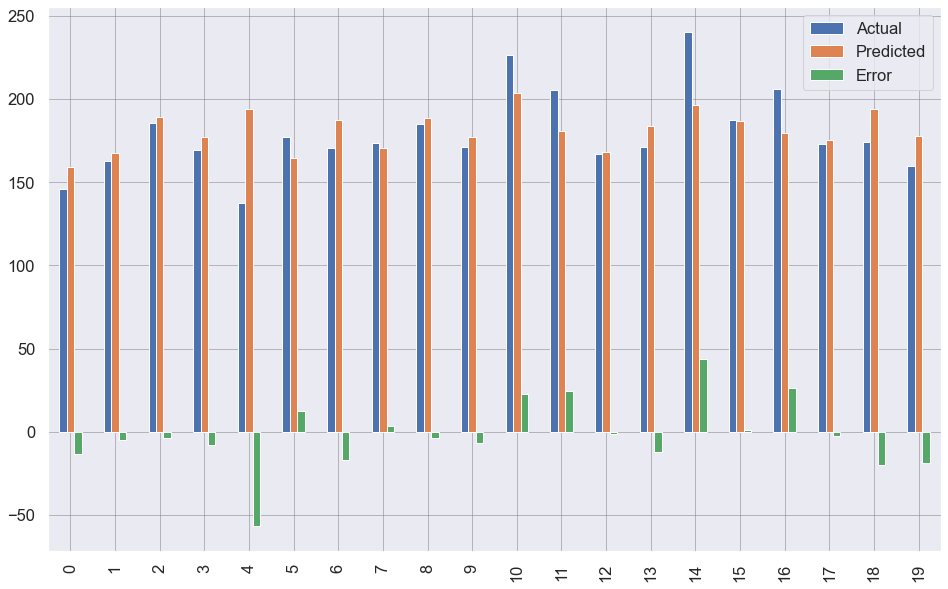

In [40]:
difplot = output.head(20)
difplot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='gray')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

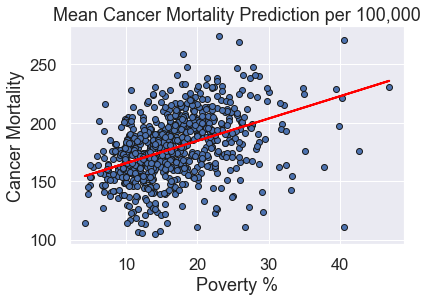

In [30]:
plt.scatter(X1_test,y1_test,edgecolors='k')
plt.plot(X1_test,y1_pred,color='red',linewidth=2)
plt.title('Mean Cancer Mortality Prediction per 100,000')
plt.ylabel('Cancer Mortality')
plt.xlabel('Poverty %')
plt.show()

In [31]:
r_square= model.score(X1_train, y1_train)
print('Coefficient of determination(R square):',r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test,y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Coefficient of determination(R square): 0.1953704753659441
Mean Absolute Error: 19.348602882950257
Mean Squared Error: 634.6142518508786
Root Mean Squared Error: 25.191551199774867


### Switching to Multivariate

In [32]:
df_mult = df.copy()
df_mult.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap  medianage  medianagemale  \
0      260131            11.2   499.748204       39.3           36.9   
1       43269            18.6    23.111234       33.0           32.2   
2       21026            14.6    47.560164       45.0           44.0   
3       75882            17.1   342.637253       42.8           42.2   
4       10321            12.5     0.000000       48.3           47.8   

   medianagefemale  avghouseholdsize  percentmarried  pctnohs18_24  \
0             41.7              2.54            52.5          11.5   
1             33.7              2.34            44.5           6.1   
2             45.8              2.62            54.2          24.0   
3             43.4              2.52            52.7          20.2   
4             48.9              2.34            57.8          14.9   

   pcths18_24  pctsomecol18_24  pctbachdeg18_24  pcths25_over  \
0        39.5        42.100000              6.9          23.2   
1        22.4        64.000000              7.5          26.0   
2        36.6        40.977034              9.5          29.0   
3        41.2        36.100000              2.5          31.6   
4        43.0        40.000000              2.0          33.4   

   pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
0               19.6                51.9                   8.0   
1               22.7                55.9                   7.8   
2               16.0                45.9                   7.0   
3                9.3                48.3                  12.1   
4               15.0                48.2                   4.8   

   pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
0                75.1                48.453774                41.6   
1                70.2                53.800000                43.6   
2                63.7                43.500000                34.9   
3                58.4                40.300000                35.0   
4                61.6                43.900000                35.1   

   pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0               32.9                    14.0  81.780529  2.594728  4.821857   
1               31.1                    15.3  89.228509  0.969102  2.246233   
2               42.1                    21.1  90.922190  0.739673  0.465898   
3               45.3                    25.0  91.744686  0.782626  1.161359   
4               44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657

In [33]:
X = df_mult[['povertypercent','incidencerate','pctpubliccoveragealone']]
y = df_mult['target_deathrate']

In [34]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y)

In [35]:
lm = linear_model.LinearRegression()
mult_model = lm.fit(X2_train,y2_train)

In [36]:
y2_pred = mult_model.predict(X2_test)

In [37]:
mult_output = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred.flatten()})
mult_output['Error'] =  mult_output['Actual'] - mult_output['Predicted']
mult_output.reset_index(drop=True,inplace=True)
mult_output

Actual   Predicted      Error
0     183.5  188.211142  -4.711142
1     163.9  185.750080 -21.850080
2     168.6  181.423807 -12.823807
3     182.5  172.867155   9.632845
4     157.1  162.203139  -5.103139
..      ...         ...        ...
757   170.1  174.396196  -4.296196
758   157.5  174.166689 -16.666689
759   203.7  191.924733  11.775267
760   169.1  166.068136   3.031864
761   159.5  157.979910   1.520090

[762 rows x 3 columns]

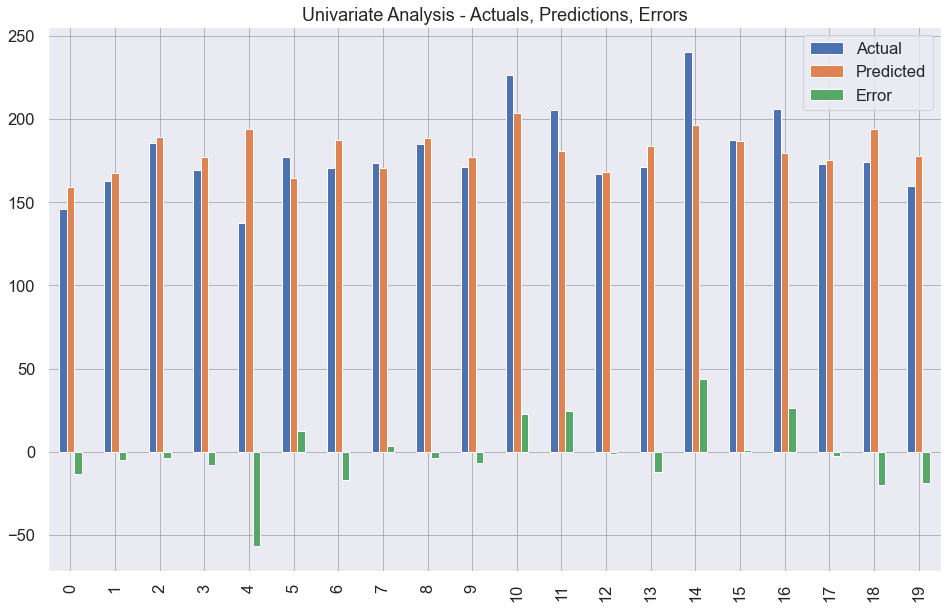

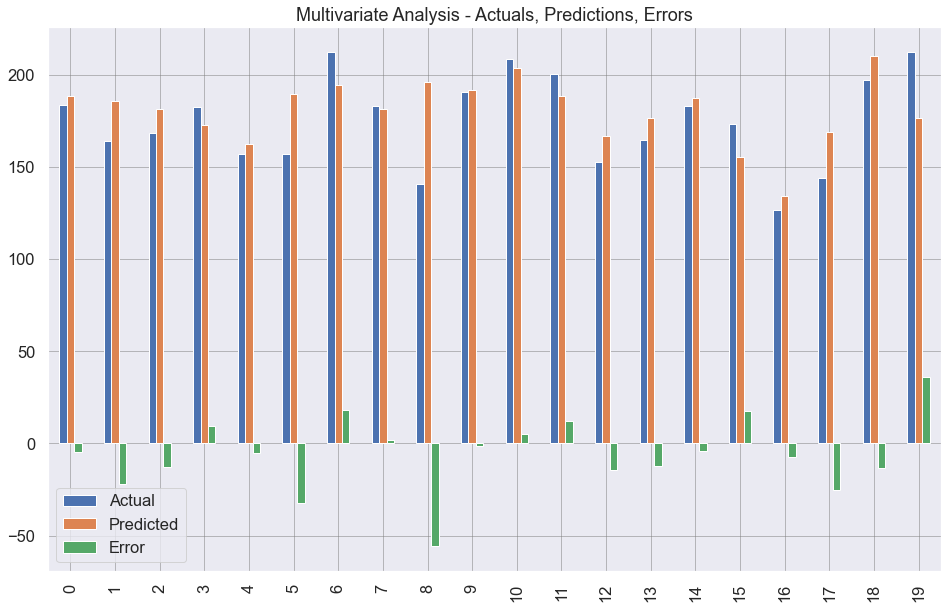

In [41]:
difplot = output.head(20)
difplot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='gray')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.title('Univariate Analysis - Actuals, Predictions, Errors')
plt.show()

difplot2 = mult_output.head(20)
difplot2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5',color='gray')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.title('Multivariate Analysis - Actuals, Predictions, Errors')
plt.show()


In [39]:
print('Univariate Linear Regression Metrics:', '\n')
r_square= model.score(X1_train, y1_train)
print('Coefficient of determination(R square):',r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test,y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('\n')

print('Multivariate Linear Regression Metrics:', '\n')
r_square= mult_model.score(X2_train, y2_train)
print('Coefficient of determination(R square):',r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Univariate Linear Regression Metrics: 

Coefficient of determination(R square): 0.1953704753659441
Mean Absolute Error: 19.348602882950257
Mean Squared Error: 634.6142518508786
Root Mean Squared Error: 25.191551199774867


Multivariate Linear Regression Metrics: 

Coefficient of determination(R square): 0.4149321449594997
Mean Absolute Error: 16.46460665893324
Mean Squared Error: 461.54636913571346
Root Mean Squared Error: 21.483630259705027
